# Project : In-vehicle coupon recommendation

### Name : Kant Charoensedtasin (Gun)

---
## Problem statement
The company want to improve coupon strategy for increasing revenue of local business  


## Objective
1. Increase number of customer for local business by giving coupon (Assumption : Revenue raise when coupon is accepted)
2. Increase number of %accepted coupon

## Hypothesis-driven Questions
1. What feature affected to accepted/unaccepted coupon?
2. What type of people trend to accept coupon?
3. What kind of behavior/environment affect to accepted coupon?
4. What type of coupon is the most popular?
5. How environment/behavior affect to type of accepted coupon?


## Dataset :  [In-vehicle coupon recommendation](https://www.kaggle.com/datasets/mathurinache/invehicle-coupon-recommendation)
### Dataset information : 
The dataset was retrieved from Kaggle. The data from this dataset was collected via a survey on Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. 
### Feature information :
- **destination**: No Urgent Place, Home, Work
- **passanger**: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
- **weather**: Sunny, Rainy, Snowy
- **temperature**: 55, 80, 30
- **time**: 2PM, 10AM, 6PM, 7AM, 10PM
- **coupon**: Restaurant(\$\<20), Coffee house, Carry out & Take away, Bar, Restaurant(\\$20-\\$50)
- **expiration** : 1d, 2h (the coupon expires in 1 day or in 2 hours)
- **gender**: Female, Male
- **age**: 21, 46, 26, 31, 41, 50plus, 36, below21
- **maritalStatus**: Unmarried partner, Single, Married partner, Divorced, Widowed
- **hasChildren**:1, 0 
- **education**: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School 
- **occupation**: Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
-**income**: \\$37500 - \\$49999, \\$62500 - \\$74999, \\$12500 - \\$24999, \\$75000 - \\$87499, \\$50000 - \\$62499, \\$25000 - \\$37499, \\$100000 or More, \\$87500 - \\$99999, Less than \\$12500
- **Car** : Car type
- **Bar**: never, less1, 1\~3, 4\~8, gt8 (feature meaning: how many times do you go to a bar every month?)
- **CoffeeHouse**: never, less1, 1\~3, 4\~8, gt8 (feature meaning: how many times do you go to a coffeehouse every month?)
- **CarryAway**: never, less1, 1\~3, 4\~8, gt8 (feature meaning: how many times do you get take-away food every month?)
- **RestaurantLessThan20** : never, less1, 1\~3, 4\~8, gt8 (feature meaning: how many times do you go to a restaurant with an average expense per person of less than \\$20 every month?)
- **Restaurant20To50**: never, less1, 1\~3, 4\~8, gt8 (feature meaning: how many times do you go to a restaurant with average expense per person of \\$20 - \\$50 every month?)
- **toCoupon_GEQ5min**: 0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 5 minutes)
- **toCouponGEQ15min**: 0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
- **toCouponGEQ25min**: 0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
- **directionsame**: 0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
- **direction_opp**: 1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
- **Y**: 1, 0 (whether the coupon is accepted)

## Data prepareation (Cleaning data)
First, we need to import package that used to handle this dataset. The dataset is collected in dataframe type in df variable

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None #Deal with SettingWithCopyWarning in Pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
sns.set_palette('Set1')
df_original = pd.read_csv('in-vehicle-coupon-recommendation.csv')
df = df_original # Copy dataframe for working

Next step, we scan the dataset  and identify how to handle this dataset 

In [2]:
# Look at the sample of dataset by using .head()
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
# Look at the sample of dataset by using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [4]:
# Identify the size of dataset
print("This dataset contain data", df.shape[0], "rows and", df.shape[1], "columns" )

This dataset contain data 12684 rows and 26 columns


Before we are going to clean the data, we must decide how to handle the missing data in the dataset by looking into the data.

In [5]:
# Identify column with null value
null_df = pd.DataFrame(df.isna().sum(),columns = ["Null_Value"])
null_df.index.name = 'Column'
Total_null = null_df.sort_values(['Null_Value'],ascending = False).head(8)
print(Total_null)

                      Null_Value
Column                          
car                        12576
CoffeeHouse                  217
Restaurant20To50             189
CarryAway                    151
RestaurantLessThan20         130
Bar                          107
destination                    0
passanger                      0


In [6]:
# Calculate % of missing data
print(round(Total_null.iloc[0]/df.shape[0]*100,2))
print(Total_null.iloc[1:6].sum())

Null_Value    99.15
Name: car, dtype: float64
Null_Value    794
dtype: int64


From result, i decide to drop the "car" columns because missing value in the column is about 99% of that data

In [7]:
df.drop(columns = ['car'],inplace = True)

For the rest of columns that have missing value, we calculate amount data which is dropped from method .dropna()

In [8]:
#Check row of data after drop missing value
print("Drop missing value =",round((1 - df.dropna().shape[0]/df.shape[0])*100,2),"% of data")

Drop missing value = 4.77 % of data


After using method .dropna(), Data is dropped about 4.77% of whole data. So, Dropping the missing value in this dataset is ok(<5% of whole data).

In [9]:
#Collect cleaned data in df_clean variable
df_clean = df.dropna()
df_clean

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


## Data exploration
The previous section is cleaning dataset in order to analyze the insight of the data. In this project, we will analyze insight data by using only vitualization.

First, we need to understand the whole dataset. In this project, feature "Y" is label which is the most important feature. The feature "Y" has 2 values such as "1" and "0". (Y = "1" : the driver accept coupon, Y = "0" : the driver unaccept coupon)

Before we are going to analyze the dataset for the objective, we need to adjust the data that ready for analysis.

In [10]:
for column in df_clean.columns:
    print("Feature :",column)
    print("Feature has", df[column].nunique(), "unique values")
    print(df[column].value_counts())
    print("------------------------")

Feature : destination
Feature has 3 unique values
No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64
------------------------
Feature : passanger
Feature has 4 unique values
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64
------------------------
Feature : weather
Feature has 3 unique values
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64
------------------------
Feature : temperature
Feature has 3 unique values
80    6528
55    3840
30    2316
Name: temperature, dtype: int64
------------------------
Feature : time
Feature has 5 unique values
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64
------------------------
Feature : coupon
Feature has 5 unique values
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: cou

### Analysis numerical data
We can find the relation between feature by using correlation. In order to using correlation, we need to convert type of nominal data in some feature to numberical data. From data exploration above, I decide to convert nominal data from expiration, age, income, Bar, CoffeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 feature to ordinal number.

In [11]:
# Change text to ordinal number
# Feature : expiration
expiration_dict = {
    '2h' : 1,
    '1d' : 2 #Longer duration of coupon
}
#Feature : age
age_dict = {
    'below21' :  0,
    '21'      :  2,
    '26'      :  3,
    '31'      :  4,
    '36'      :  5,
    '41'      :  6,
    '46'      :  7,
    '50plus'  :  8,
}
#Feature : income
income_dict ={
    'Less than $12500' : 0,
    '$12500 - $24999'  : 1,
    '$25000 - $37499'  : 2,
    '$37500 - $49999'  : 3,
    '$50000 - $62499'  : 4,
    '$62500 - $74999'  : 5,
    '$75000 - $87499'  : 6,
    '$87500 - $99999'  : 7,
    '$100000 or More'  : 8 
}
#Feature : Bar, CoffeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 (same value)
freq_dict = {
    'never' : 0,
    'less1' : 1,
    '1~3'   : 2,
    '4~8'   : 3,
    'gt8'   : 4
}
#Replace value in dataframe with ordinal value
df_clean.loc[:,'expiration'] = df_clean.loc[:,'expiration'].map(expiration_dict)
df_clean.loc[:,'age'] = df_clean.loc[:,'age'].map(age_dict)
df_clean.loc[:,'income'] = df_clean.loc[:,'income'].map(income_dict)
freq_feature = ['Bar','CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']
for feature in freq_feature:
    df_clean.loc[:,feature] = df_clean.loc[:,feature].map(freq_dict)

In [12]:
df_clean #Check the result after convert nominal to numerical data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),2,Male,2,Single,...,1,3,3,1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,1,Male,2,Single,...,1,3,3,1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,2,Male,2,Single,...,1,3,3,1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,1,Male,2,Single,...,1,3,3,1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2,Male,2,Single,...,1,3,3,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,2,Male,3,Single,...,0,2,3,2,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,2,Male,3,Single,...,0,2,3,2,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,2,Male,3,Single,...,0,2,3,2,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,2,Male,3,Single,...,0,2,3,2,1,1,1,0,1,0


Another set of data in this dataset is the driving distant to restaurant using the coupon. We can convert nominal data in  toCoupon_GEQ5min,toCoupon_GEQ15min and toCoupon_GEQ25min feature to ordinal number.

In [13]:
#Create new column call 'dist' represent distant between shop and current location
df_clean['dist'] = None
df_clean.loc[df['toCoupon_GEQ15min'] == 0,['dist']] = 0
df_clean.loc[(df['toCoupon_GEQ15min'] == 1) & (df['toCoupon_GEQ25min'] == 0),['dist']] = 1
df_clean.loc[(df['toCoupon_GEQ15min'] == 1) & (df['toCoupon_GEQ25min'] == 1),['dist']] = 2
#Convert type of column 'dist' to int64
df_clean['dist'] = df_clean['dist'].astype('int64')

In [14]:
#Then drop 'toCoupon_GEQ5min','toCoupon_GEQ15min' and 'toCoupon_GEQ25min' feature
df_clean.drop(columns = ['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'],inplace = True)

In [15]:
df_clean.info() # Check type of data in the feature

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  int64 
 7   gender                12079 non-null  object
 8   age                   12079 non-null  int64 
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  int64 
 14  Bar                   12079 non-null  int64 
 15  CoffeeHouse           12079 non-nul

Next step, Let's caluculate the correlation between feature by using .corr() method and plot heatmap for represent correlation matrix.

In [16]:
df_clean.corr()

,temperature,expiration,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y,dist
temperature,1.000000,-0.125889,-0.011788,-0.020674,-0.026463,0.002075,-0.016783,0.012090,0.031073,-0.027650,0.097539,-0.097539,0.056646,-0.218121
expiration,-0.125889,1.000000,-0.021089,-0.018086,-0.018334,-0.009886,-0.003630,0.001379,-0.013255,-0.004020,-0.034709,0.034709,0.133131,-0.016266
age,-0.011788,-0.021089,1.000000,0.438026,0.081168,-0.147134,-0.058636,-0.056658,0.000230,-0.000968,-0.032543,0.032543,-0.057954,0.029511
has_children,-0.020674,-0.018086,0.438026,1.000000,0.098848,-0.205094,0.036041,-0.065068,-0.033423,-0.010207,-0.033047,0.033047,-0.048333,0.051846
income,-0.026463,-0.018334,0.081168,0.098848,1.000000,0.042983,-0.020616,0.025463,0.109281,0.167148,-0.025300,0.025300,-0.028862,0.013057
Bar,0.002075,-0.009886,-0.147134,-0.205094,0.042983,1.000000,0.252088,0.197706,0.158937,0.276557,-0.002573,0.002573,0.072649,-0.019767
CoffeeHouse,-0.016783,-0.003630,-0.058636,0.036041,-0.020616,0.252088,1.000000,0.224194,0.304643,0.246870,-0.005211,0.005211,0.112868,-0.003220
CarryAway,0.012090,0.001379,-0.056658,-0.065068,0.025463,0.197706,0.224194,1.000000,0.405206,0.178708,-0.003445,0.003445,0.036913,-0.010069
RestaurantLessThan20,0.031073,-0.013255,0.000230,-0.033423,0.109281,0.158937,0.304643,0.405206,1.000000,0.405207,-0.010125,0.010125,0.037051,-0.013754
Restaurant20To50,-0.027650,-0.004020,-0.000968,-0.010207,0.167148,0.276557,0.246870,0.178708,0.405207,1.000000,-0.008713,0.008713,0.073151,-0.013077


Using heatmap method from seaborn to plot the heatmap

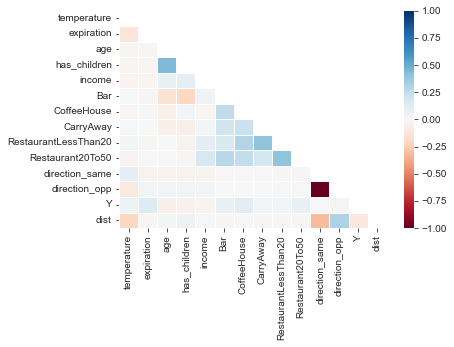

In [17]:
mask = np.triu(np.ones_like(df_clean.corr(), dtype=bool)) # Upper triangle is True
heatmap = sns.heatmap(df_clean.corr(),cmap= 'RdBu',mask = mask, vmin = -1, vmax = 1, linewidths=.5)

After using heatmap, we slightly see the difference of the correlation because correlation between Y and other variable are low.  The correlation between 'direction_same' and 'direction_opp' is -1 which mean they have perfect negative correlation. Then, we can drop 1 of this feature.

In [18]:
df_clean.drop(columns = ['direction_opp'],inplace = True)

Let's focus only correlation between accepted coupon and the other.

[Text(0.5, 16.0, 'Accepted coupon')]

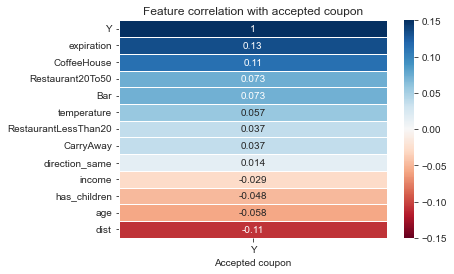

In [19]:
#Select only column 'Y' in correlation dataframe and adjust the color range in heatmap
accept_corr = sns.heatmap(df_clean.corr()[['Y']].sort_values('Y',ascending = False),annot = True,cmap = 'RdBu',vmax = 0.15,vmin = -0.15, linewidths=.5)
accept_corr.set_title('Feature correlation with accepted coupon')
accept_corr.set(xlabel = 'Accepted coupon')

As the result of the analysis in the first part, there are 3 features that have correlation with accepted coupon greater than 0.1 e.g. expiration, Coffee House, and distant. This 3 feature affect to the accepted coupon more than the others. The expiration feature has positive correlation with accepted coupon which means the duration of coupon affect the accepted coupon in the same direction. In contrast, distant feature has negative correlation with accepted coupon. Distant between current location affect to accepted coupon in the opposite direction.

### Analysis categorical data
There are 9 features that contain categorical data. We require to analyze by plotting graph separately. In this section, we analyze separate into 2 section. The First section is relation between accepted coupon and categorical feature. The second is relation between type of coupon and selected categorical feature from the first section.

Check balancing of data between accepted and unaccepted coupon

In [20]:
#Check amount of accepted/unaccepted coupon
accept_coupon_df = df_clean[df_clean['Y'] == 1]
unaccept_coupon_df = df_clean[df_clean['Y'] == 0]
print(f'accepted coupon   : {accept_coupon_df.shape[0]} ({round(accept_coupon_df.shape[0]/df_clean.shape[0]*100,1)}%)')
print(f'unaccepted coupon : {unaccept_coupon_df.shape[0]} ({round(unaccept_coupon_df.shape[0]/df_clean.shape[0]*100,1)}%)')

accepted coupon   : 6877 (56.9%)
unaccepted coupon : 5202 (43.1%)


Using countplot from seaborn libraly to display the relation between variable and count

Text(0.5, 1.0, 'Number of accepted/unaccepted coupon for all coupon type')

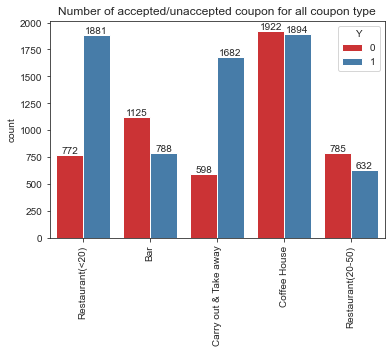

In [21]:
xtick_order = ['Restaurant(<20)','Bar','Carry out & Take away','Coffee House','Restaurant(20-50)'] # Sequence entire graph with this ticks order
accpeted_coupon_type = sns.countplot(x = 'coupon',order = xtick_order,hue = 'Y',data = df_clean,palette = sns.color_palette("Set1")) #another palette : 'Pastel1'
for p in accpeted_coupon_type.patches: #Annotation the value of bar
        accpeted_coupon_type.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+15),ha = 'center')
accpeted_coupon_type.set_xticklabels(accpeted_coupon_type.get_xticklabels(),rotation = 90) #rotate the tick
accpeted_coupon_type.set(xlabel = None)
accpeted_coupon_type.set_title('Number of accepted/unaccepted coupon for all coupon type')

There are 8 features for plotting the relation between count and feature. So, we use subplot from matplotlib to define the plotting region and fill it with countplot. 

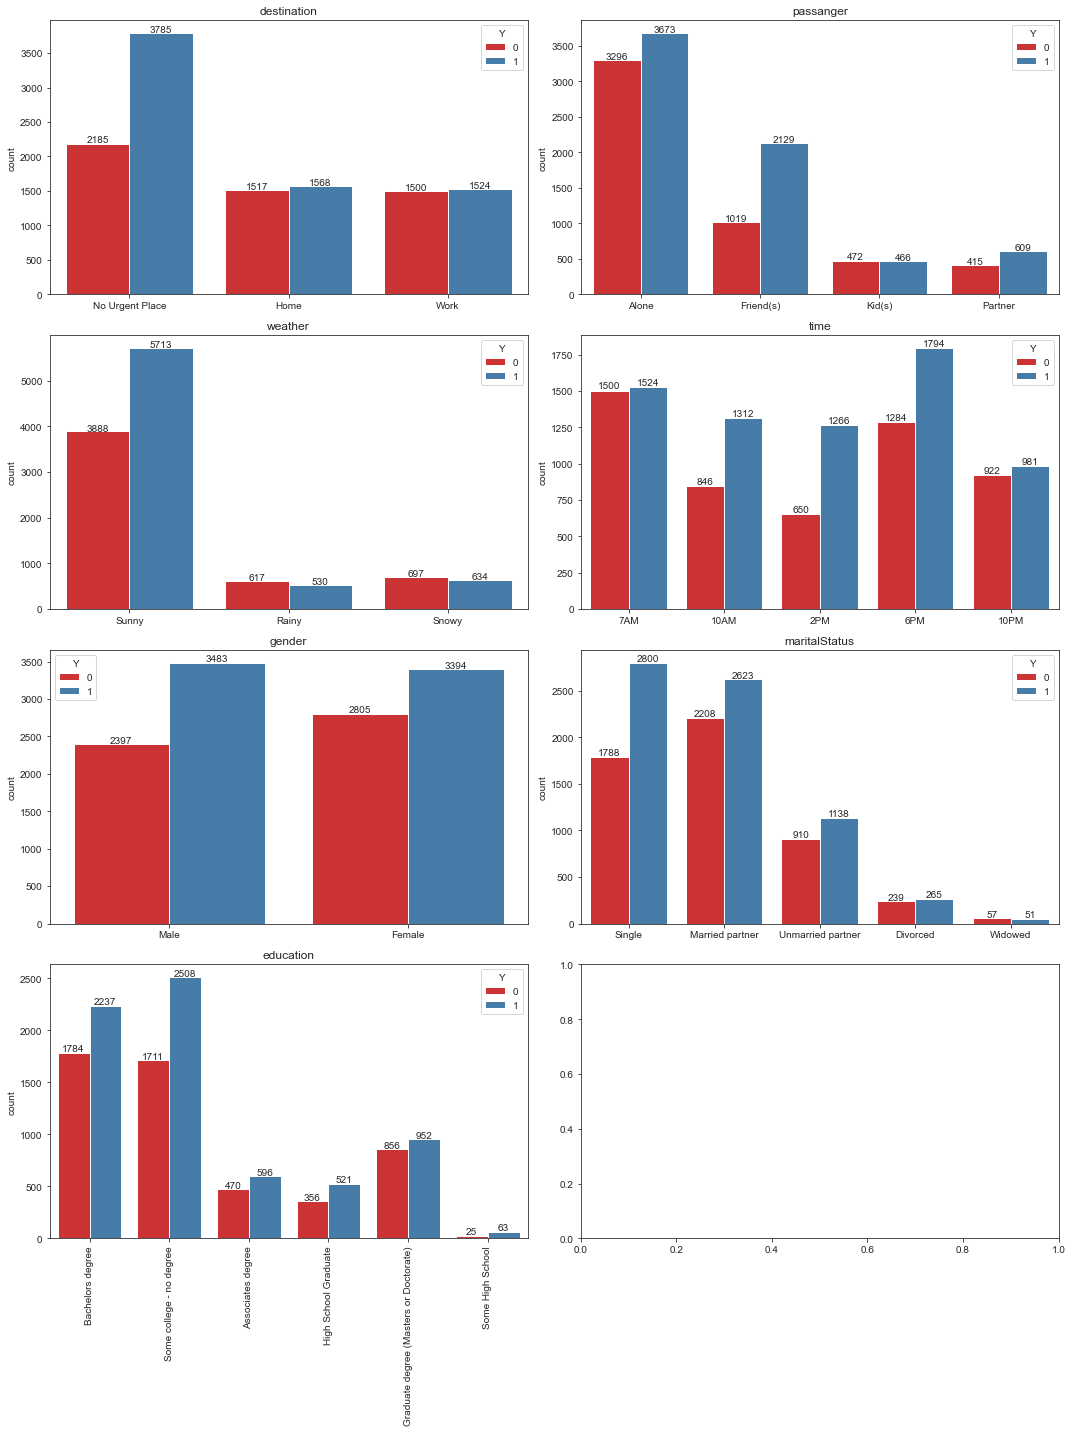

In [22]:
#define plotting region (4rows, 2columns)
fig, axes = plt.subplots(4,2,figsize = (15,20))

#create countplot in each subplot
#Row1 - 2 : Driving feature
destination_plot = sns.countplot(x = 'destination',hue = 'Y',data = df_clean, ax = axes[0][0])
for p in destination_plot.patches:
        destination_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+15),ha = 'center')
destination_plot.set(xlabel = None) # Remove x label
destination_plot.set(title = 'destination') #Set title of the graph

passanger_plot   = sns.countplot(x = 'passanger',hue = 'Y',data = df_clean, ax = axes[0][1])
for p in passanger_plot.patches:
        passanger_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+15),ha = 'center')
passanger_plot.set(xlabel = None)
passanger_plot.set(title = 'passanger')

weather_plot = sns.countplot(x = 'weather',hue = 'Y',data = df_clean, ax = axes[1][0])
for p in weather_plot.patches:
        weather_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+15),ha = 'center')
weather_plot.set(xlabel = None)
weather_plot.set(title = 'weather')

time_plot = sns.countplot(x = 'time',hue = 'Y',order = ['7AM', '10AM','2PM','6PM','10PM'],data = df_clean, ax = axes[1][1])
for p in time_plot.patches:
        time_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+15),ha = 'center')
time_plot.set(xlabel = None)
time_plot.set(title = 'time')

#Row3 - 4 : Personal feature (including 'occupation' graph below)
gender_plot = sns.countplot(x = 'gender',hue = 'Y',data = df_clean, ax = axes[2][0])
for p in gender_plot.patches:
        gender_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+15),ha = 'center')
gender_plot.set(xlabel = None)
gender_plot.set(title = 'gender')

maritalStatus_plot = sns.countplot(x = 'maritalStatus',hue = 'Y',data = df_clean, ax = axes[2][1])
for p in maritalStatus_plot.patches:
        maritalStatus_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+15),ha = 'center')
maritalStatus_plot.set(xlabel = None)
maritalStatus_plot.set(title = 'maritalStatus')

education_plot = sns.countplot(x = 'education',hue = 'Y',data = df_clean, ax = axes[3][0])
for p in education_plot.patches:
        education_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+15),ha = 'center')
education_plot.set_xticklabels(education_plot.get_xticklabels(),rotation = 90)
education_plot.set(xlabel = None)
education_plot.set(title = 'education')

plt.tight_layout() # Avoid overlapping of graph

[Text(0.5, 1.0, 'occupation')]

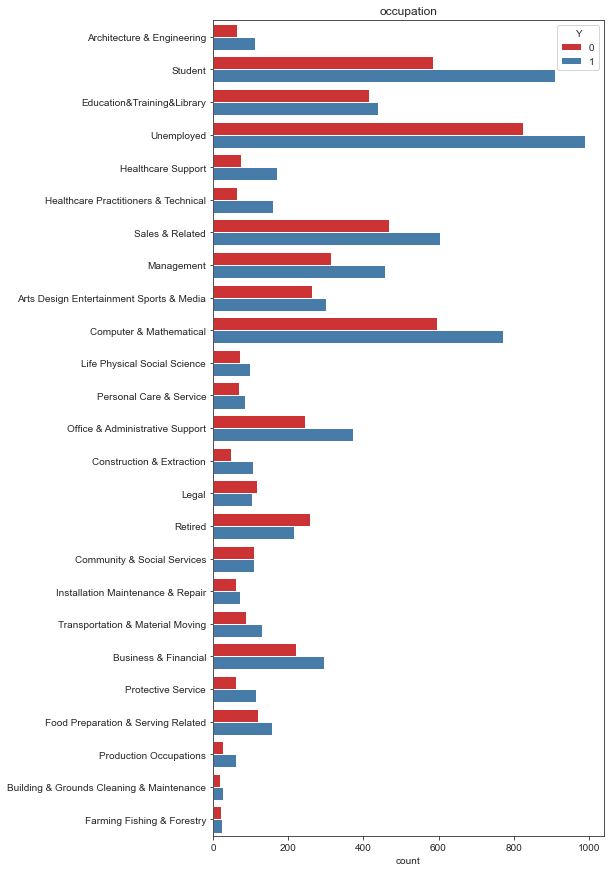

In [23]:
fig2, axes2 = plt.subplots(figsize = (7,15)) #Define size of graph for suitable format 
occupation_plot = sns.countplot(y = 'occupation',hue = 'Y',data = df_clean)
occupation_plot.set(ylabel = None)
occupation_plot.set(title = 'occupation')

From exploring the 1$^{st}$ categorical part of dataset, we can extract the most accepted coupon rate from graph.
- destination feature : No urgent place.
- passanger feature : Friend(s)
- weather feature : Sunny
- time feature : period 10AM - 6PM
- gender feature : Male accept coupon rate equal to female
- maritialStatus feature : Single
- educatioin : Some college - no degree
- occupation : Student

The second part of categorical analysis is analyzing relation between coupon type and extracted information from the first part. We use subplot that is exactly the same as previous part and fill the subplot with countplot for exploring the data.

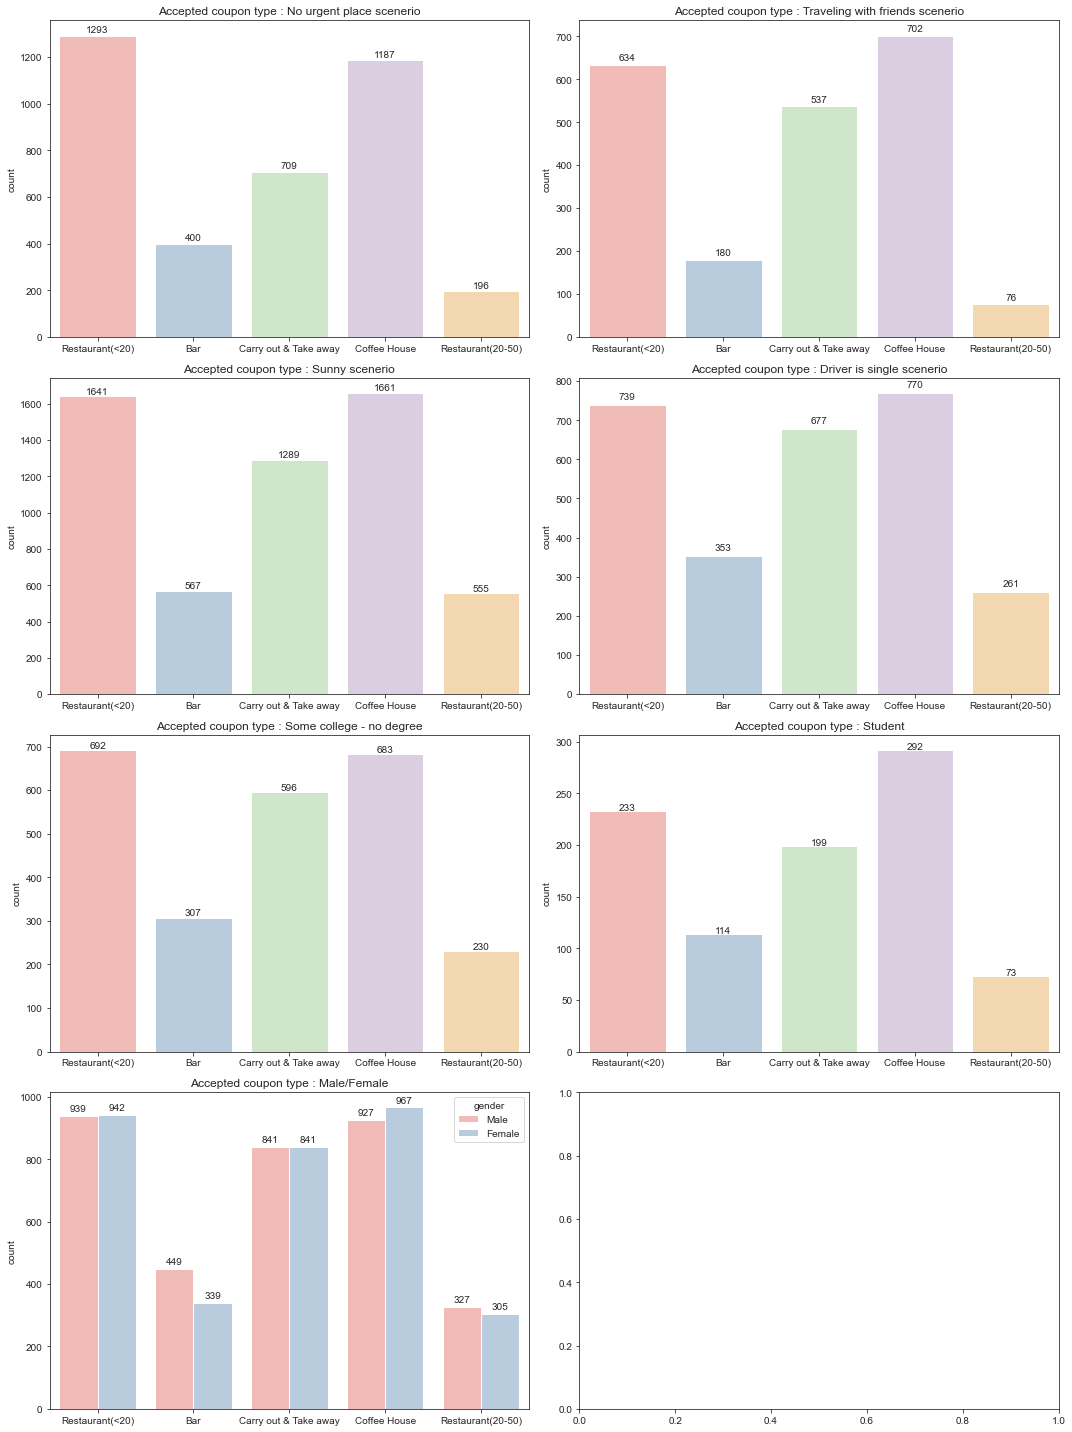

In [24]:
#define plotting region (4rows, 2columns)
fig3, axes3 = plt.subplots(4,2,figsize = (15,20))

#Count plot with accepted coupon and destination : No urgent place scenario
NoDest_coupon_type = sns.countplot(x = 'coupon',order = xtick_order,data = df_clean[(df_clean['Y'] == 1)&(df_clean['destination'] == 'No Urgent Place')],palette = sns.color_palette("Pastel1"),ax = axes3[0][0])
for p in NoDest_coupon_type.patches:
        NoDest_coupon_type.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+15),ha = 'center')
#NoDest_coupon_type.set_xticklabels(NoDest_coupon_type.get_xticklabels(),rotation = 90)
NoDest_coupon_type.set(xlabel = None)
NoDest_coupon_type.set_title('Accepted coupon type : No urgent place scenerio')

#Count plot with accepted coupon and passanger : friend(s) scenario
Friend_coupon_type = sns.countplot(x = 'coupon',order = xtick_order,data = df_clean[(df_clean['Y'] == 1)&(df_clean['passanger'] == 'Friend(s)')],palette = sns.color_palette("Pastel1"),ax = axes3[0][1])
for p in Friend_coupon_type.patches:
        Friend_coupon_type.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+10),ha = 'center')
#Friend_coupon_type.set_xticklabels(Friend_coupon_type.get_xticklabels(),rotation = 90)
Friend_coupon_type.set(xlabel = None)
Friend_coupon_type.set_title('Accepted coupon type : Traveling with friends scenerio')

#Count plot with accepted coupon and weather : Sunny scenario
weather_coupon_type = sns.countplot(x = 'coupon',order = xtick_order,data = df_clean[(df_clean['Y'] == 1)&(df_clean['weather'] == 'Sunny')],palette = sns.color_palette("Pastel1"),ax = axes3[1][0])
for p in weather_coupon_type.patches:
        weather_coupon_type.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+15),ha = 'center')
#weather_coupon_type.set_xticklabels(weather_coupon_type.get_xticklabels(),rotation = 90)
weather_coupon_type.set(xlabel = None)
weather_coupon_type.set_title('Accepted coupon type : Sunny scenerio')

#Count plot with accepted coupon and maritialStatus : single scenario
Single_coupon_type = sns.countplot(x = 'coupon',order = xtick_order,data = df_clean[(df_clean['Y'] == 1)&(df_clean['maritalStatus'] == 'Single')],palette = sns.color_palette("Pastel1"),ax = axes3[1][1])
for p in Single_coupon_type.patches:
        Single_coupon_type.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+15),ha = 'center')
#Single_coupon_type.set_xticklabels(Single_coupon_type.get_xticklabels(),rotation = 90)
Single_coupon_type.set(xlabel = None)
Single_coupon_type.set_title('Accepted coupon type : Driver is single scenerio')

#Count plot with accepted coupon and education : Some college - no degree scenario
education_coupon_type = sns.countplot(x = 'coupon',order = xtick_order,data = df_clean[(df_clean['Y'] == 1)&(df_clean['education'] == 'Some college - no degree')],palette = sns.color_palette("Pastel1"),ax = axes3[2][0])
for p in education_coupon_type.patches:
        education_coupon_type.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+5),ha = 'center')
#education_coupon_type.set_xticklabels(education_coupon_type.get_xticklabels(),rotation = 90)
education_coupon_type.set(xlabel = None)
education_coupon_type.set_title('Accepted coupon type : Some college - no degree')

#Count plot with accepted coupon and occupation : Student scenario
occupation_coupon_type = sns.countplot(x = 'coupon',order = xtick_order,data = df_clean[(df_clean['Y'] == 1)&(df_clean['occupation'] == 'Student')],palette = sns.color_palette("Pastel1"),ax = axes3[2][1])
for p in occupation_coupon_type.patches:
        occupation_coupon_type.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),ha = 'center')
#occupation_coupon_type.set_xticklabels(occupation_coupon_type.get_xticklabels(),rotation = 90)
occupation_coupon_type.set(xlabel = None)
occupation_coupon_type.set_title('Accepted coupon type : Student')

#Count plot with accepted coupon and gender
gender_coupon_type = sns.countplot(x = 'coupon',order = xtick_order,hue = 'gender',data = accept_coupon_df,palette = sns.color_palette("Pastel1"),ax = axes3[3][0])
for p in gender_coupon_type.patches:
        gender_coupon_type.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+15),ha = 'center')
#gender_coupon_type.set_xticklabels(gender_coupon_type.get_xticklabels(),rotation = 90)
gender_coupon_type.set(xlabel = None)
gender_coupon_type.set_title('Accepted coupon type : Male/Female')

plt.tight_layout()

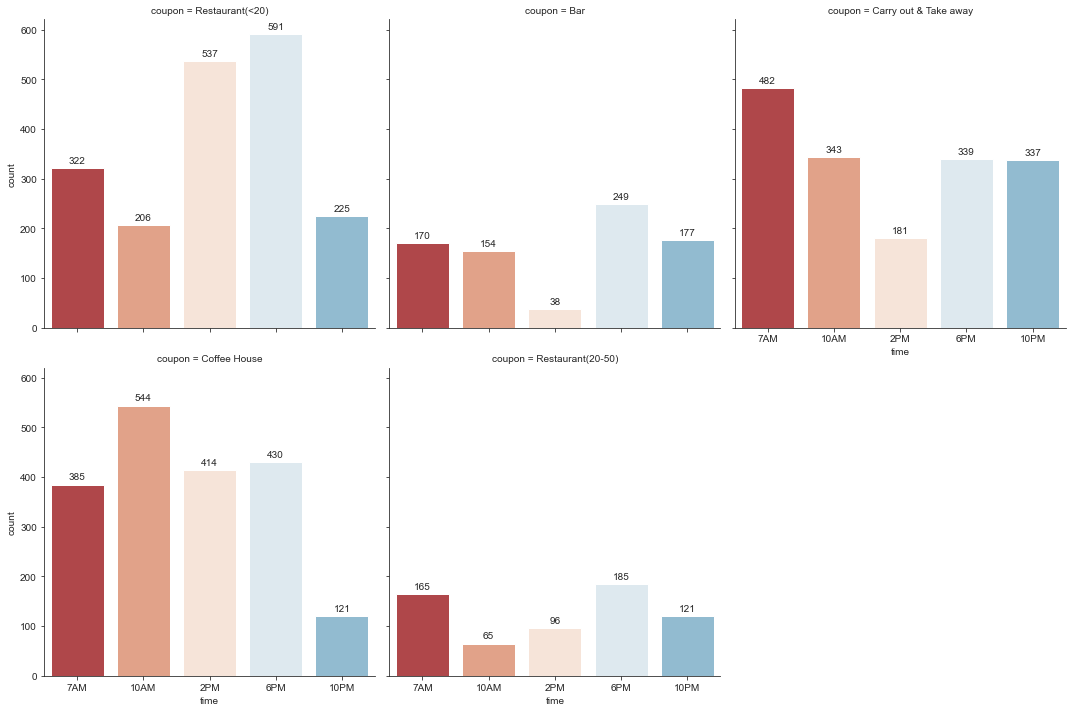

In [25]:
#Count plot with accepted coupon and time
time_coupon_type = sns.catplot(x = 'time',kind = 'count',order = ['7AM','10AM','2PM','6PM','10PM'],col = 'coupon',col_wrap = 3,data = accept_coupon_df,palette = sns.color_palette("RdBu"))
for ax in time_coupon_type.axes.ravel(): #iteration over facet grid (seaborn)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+10),ha = 'center')

From exploring the 2$^{nd}$ categorical part of dataset, we can extract the most accepted coupon type from the graph. All scenerio are accepted coupon and the result display below.

In [26]:
#Extract and print top 3 accepted coupon type from each scenario
dict_extract = {
    'destination' : 'No Urgent Place',
    'passanger' : 'Friend(s)',
    'weather' : 'Sunny',
    'maritalStatus' : 'Single',
    'education' : 'Some college - no degree',
    'occupation' : 'Student'
}
for key, value in dict_extract.items():
    print(f'{key} = {value} scenario ')
    print(accept_coupon_df[accept_coupon_df[key] == value]['coupon'].value_counts().head(3))
    print('----------------------------------------')
gender = ['Male', 'Female']
for value in gender:
    print(f'gender = {value} scenario ')
    print(accept_coupon_df[accept_coupon_df['gender'] == value]['coupon'].value_counts().head(3))
    print('----------------------------------------')

destination = No Urgent Place scenario 
Restaurant(<20)          1293
Coffee House             1187
Carry out & Take away     709
Name: coupon, dtype: int64
----------------------------------------
passanger = Friend(s) scenario 
Coffee House             702
Restaurant(<20)          634
Carry out & Take away    537
Name: coupon, dtype: int64
----------------------------------------
weather = Sunny scenario 
Coffee House             1661
Restaurant(<20)          1641
Carry out & Take away    1289
Name: coupon, dtype: int64
----------------------------------------
maritalStatus = Single scenario 
Coffee House             770
Restaurant(<20)          739
Carry out & Take away    677
Name: coupon, dtype: int64
----------------------------------------
education = Some college - no degree scenario 
Restaurant(<20)          692
Coffee House             683
Carry out & Take away    596
Name: coupon, dtype: int64
----------------------------------------
occupation = Student scenario 
Coffee Hou

The Restaurant(<20), Coffee House and Carry out & take away coupon is top 3 accepted coupon type among all scenerio. 

For extracted data from time series, we can conclude separately between coupon type. This information contain the best period and the worst period for providing coupon.
- Restaurant(<20) : The best period is 2PM - 6PM.
- Bar : The worst time is 2PM.
- Carry out & Take away : The best time is at 7AM. The worst time is at 2PM.
- Coffee House : The worst time is at 10PM.
- Restaurant(20-50) :The best time is at 6PM. The worst time is at 10AM.

## Key finding
Answer the hypothesis question.
### 1. What feature affected to accepted/unaccepted coupon?

For numerical data, three feature that affect to accepted coupon are coupon expiration, Coffee House frequency and distant between current location and using coupon location. 

### 2. What type of people trend to accept coupon?

- Gender : Male accept coupon equally to female.
- Marital Status: Single driver trend to accept coupon more than the other.
- Educatioin : The most accepted coupon was people in some college - no degree.
- Occupation : The most accepted coupon was student

### 3. What kind of behavior will affect to accepted coupon?

- The driver has no destination.
- Passenger in the car is friends. 
- The weather is sunny.
- The period is 10AM - 6PM.

### 4. What type of coupon is the most popular?

- Restaurant(<20) and Coffee House coupon are the most popular coupon type.

### 5. How environment/behavior affect to type of accepted coupon?
- Behavior and environment don't affect to type of accepted coupon that much.
- Time is the most affect to type of accepted coupon.


## Recommendation
This dataset has a lot of feature (26 features). In data exploration, the result from visualization can only extract the information from feature separately. 
1. They can improve the amount of accepted coupon by following the information extracted from data visualization.
2. This dataset is more suitable for modeling because of complexing of the data. The suitable model for this dataset is classification models (e.g., logistic regression, decision tree and neural network).
3. Prediction from the model is more accuracy from using only visualization in this dataset.